# Assignment 4: Movie Review Analysis [50 Pt]

In this assignment, we will build a recurrent neural network to work with sequential text data, specificially, movie review data to identify the reviewer sentiment. In the process of completing this assignment, you will:
    
1. Clean and process text data for machine learning.
2. Perform tokenization of text data.
3. Understand and implement a word-level recurrent neural network.
4. Implement batching of text data using a DataLoader before training a recurrent neural network.
5. Understand how to apply pretrained models for transfer learning in natural language processing projects.

### What to submit

Submit an HTML file containing all your code, outputs, and write-up
from parts A and B. You can produce a HTML file directly from Google Colab. The Colab instructions are provided at the end of this document.

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission.

This year we will be using an autograding script to check your model performance on a hidden test set. To do this, we need you to provide your model definition and your model weights along with your assignment submission.

Instructions on the additional files you need to submit are provided below. Please make sure to test your submitted files before submitting them, failure in loading these files may result in a grade of 0 in the results section of the assignment.

# 📑 **Autograding**

This assignment uses an autograding script to **evaluate your model performance on a hidden test set**. You must provide your model definition and model weights along with your assignment submission to ensure compatibility with the autograding system.

---

## 📁 **Required Files for Submission**

You need to submit the following **four files** in addition to the **HTML file** as previously instructed. Make sure to replace `your_name_connected_by_underscore` and `your_student_id` with your actual name and student ID, respectively:

1. **RNN Model Definition:** `A4-RNN-your_name_connected_by_underscore-your_student_id.py`
2. **RNN Model Weights:** `A4-RNN-your_name_connected_by_underscore-your_student_id.pth`
3. **BERT Model Definition:** `A4-BERT-your_name_connected_by_underscore-your_student_id.py`
4. **BERT Model Weights:** `A4-BERT-your_name_connected_by_underscore-your_student_id.pth`

---

## 🧑‍💻 **Model Definition Files (`.py`)**

### 📝 **Steps to Complete:**

1. **Copy Model Definition Code:** Copy the complete model definition code from your `A4.ipynb` notebook into the provided template files (`.py`).
2. **Complete the TODOs:** Make sure all TODOs in the files are properly completed:
   - Define your model class (`SentimentRNN` or `SentimentClassifier`).
   - Implement the `prepare_model()` function with the exact hyperparameters used during training.
   - Ensure preprocessing steps match those in your notebook.
   - Set the `EMBEDDINGS_TYPE` parameter appropriately (`'pooled'` or `'last_hidden_state'` for BERT).
3. **Command-Line Usability:** Ensure the script accepts a file path as an argument and runs from the command line as described in the file headers.

---

### 💻 **Example Command-Line Usage**

```bash
python A4-RNN-your_name_connected_by_underscore-your_student_id.py /path/to/test_dataset.csv
```
---


## 💾 **Model Weights Files (`.pth`)**

1. **Save Model Weights:** During training, save your model's best-performing weights using the `torch.save()` method.
2. **Naming Convention:** Ensure the `.pth` file names match the `.py` file names exactly, except for the file extension.
3. **Example Code for Saving Weights:**

```python
torch.save(model.state_dict(), 'A4-RNN-your_name_connected_by_underscore-your_student_id.pth')
```
---

## ✅ **Testing Your Submission: Autograder Compatibility**

You will be provided with an **"Example Test IMDB Dataset.csv"** that you can use to test your autograding file compatibility. Please follow the example command line usage to provide the test data to test the script for each of the two `.py` scripts you are submitting.

### 🧪 **How to Test:**

1. **Run the Test Notebook:** Open and run the `test_your_submitted_files.ipynb` notebook.
2. **Verify Output:** Ensure the notebook can:
   - Load your `.py` model definition files.
   - Load your `.pth` model weights files.
   - Run predictions correctly using the provided **Example Test IMDB Dataset.csv**.
3. **Debug as Needed:** If any step fails, debug the issue and retest before submission (You can ask for help on Piazza!).

---

### 🚦 **Autograder Sentinel Lines**

Make sure your scripts output predictions between the sentinel lines **exactly** as shown below:

```text
===start_output===
0
1
0
1
...
===end_output===
```

## Colab Link

Include a link to your Colab file here. If you would like the TA to look at your Colab file in case your solutions are cut off, **please make sure that your Colab file is publicly accessible at the time of submission.**

In [1]:
# TO BE COMPLETED

# http://

# PART A - Sentiment Analysis

In this part we will construct a world-level LSTM model for identifying positive and negative reviews. This will be done in a similar way to what was shared in the preparation code for Assignment 4.

In [2]:
# load standard modules/libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# load special modules/libraries
import os
import warnings
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from collections import Counter
import string
import re
from tqdm  import tqdm

# load pytorch modules/libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset,DataLoader


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Austin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Part 1. Data Cleaning [5 pt]

We will be using the "IMDB Movie Review Dataset" provided on the course website. Download "IMDB Dataset.csv" into your Colab workspace.

### Part (i) [1pt EXPLORATORY]

Open up the file in Python, and examine some examples of positive and negative reviews. Comment on the quality of the data and any challenges you foresee in working with these data. Pick one example of a positive review and one of a negative review to support your comments.

In [3]:
# download IMDB review data

# load dataset
df = pd.read_csv("IMDB Dataset.csv")

# process into data and labels
X = df['review'].values
y = df['sentiment'].values

Potential Problems:

In [4]:
# TO BE COMPLETED
print("Undeleted HTML tags, e.g., ", X[1][-30:-10])
print("Different sentence length: ", "X[0] =", len(X[0]), ", X[1] =", len(X[1]))

Undeleted HTML tags, e.g.,  n...<br /><br />Fars
Different sentence length:  X[0] = 1107 , X[1] = 2054


In [5]:
'''
PROVIDE YOUR ANSWER BELOW
Other than the two potential problems shown above, there are several sentences that have grammar errors, and some sentences have mixed sentiments, 
which both could potentially cause incorrect prediction in the future.
'''

'\nPROVIDE YOUR ANSWER BELOW\nOther than the two potential problems shown above, there are several sentences that have grammar errors, and some sentences have mixed sentiments, \nwhich both could potentially cause incorrect prediction in the future.\n'

### Part (ii) [1pt EXPLORATORY]

Perform summary statistics on the dataset. What is the average character length of a review? What are the lengths of the longest and shortest reviews?

How many positive reviews and negative reviews are there. Generate a histogram to compare the average character length for positive and negative reviews. Comment on the differences in positive and negative reviews and how that may affect the model you will be using later.

Average character length: 1311.24 characters
Longest review: 13704 characters
Shortest review: 32 characters
Number of positive reviews: 20004
Number of negative reviews: 19996


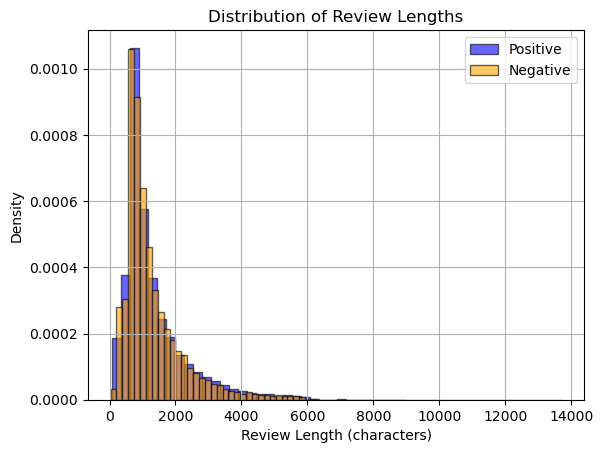

In [6]:
# TO BE COMPLETED
df['review_length'] = df['review'].apply(len)
average_length = df['review_length'].mean()
max_length = df['review_length'].max()
min_length = df['review_length'].min()
sentiment_counts = df['sentiment'].value_counts()


print(f'Average character length: {average_length:.2f} characters')
print(f'Longest review: {max_length} characters')
print(f'Shortest review: {min_length} characters')
print(f'Number of positive reviews: {sentiment_counts.get("positive", 0)}')
print(f'Number of negative reviews: {sentiment_counts.get("negative", 0)}')

df[df['sentiment'] == 'positive']['review_length'].hist(alpha=0.6, color='blue', label='Positive', bins=50, edgecolor='black', density=True)
df[df['sentiment'] == 'negative']['review_length'].hist(alpha=0.6, color='orange', label='Negative', bins=50, edgecolor='black', density=True)
plt.xlabel('Review Length (characters)')
plt.ylabel('Density')
plt.title('Distribution of Review Lengths')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
'''
PROVIDE YOUR ANSWER BELOW
General observations: as shown in the last output

Observations between positive and negative reviews: 
1. Positive reviews dominate after the texts have more than 4000 characters
2. Negative reviews mostly have shorter lengths

Potential Effects:
1. Since positive reviews are genreally longer, the trained model may prefer to associate long reviews towards positive sentiment,
    which could misclassify long negative reviews
2. Since we have to normalize the review lengths, noise could be introduced when padding short reviews, or losing information when 
    truncating long reviews
'''

'\nPROVIDE YOUR ANSWER BELOW\nGeneral observations: as shown in the last output\n\nObservations between positive and negative reviews: \n1. Positive reviews dominate after the texts have more than 4000 characters\n2. Negative reviews mostly have shorter lengths\n\nPotential Effects:\n1. Since positive reviews are genreally longer, the trained model may prefer to associate long reviews towards positive sentiment,\n    which could misclassify long negative reviews\n2. Since we have to normalize the review lengths, noise could be introduced when padding short reviews, or losing information when \n    truncating long reviews\n'

### Part (iii) [1pt EXPLORATORY]

The following helper code will be used to process the data before we can train our LSTM model. In point form comment on what processing steps are performed in the code provided below and why these steps are necessary or beneficial to training and LSTM.

In [8]:
def preprocess_string(str1):
    # remove all non-word characters excluding number and letters
    str1= re.sub(r"[^\w\s]",'',str1)
    # remove all whitespace with no space
    str1= re.sub(r"\s",'',str1)
    # replace digits with no space
    str1= re.sub(r"\d",'',str1)
    return str1

def preprocess_sentence(sen1):
    word_list=[]
    stop_word = set(stopwords.words("english"))
    for word in sen1.lower().split():
        word = preprocess_string(word)
        if word not in stop_word and word!='':
            word_list.append(word)
    return word_list

def get_stoi(data):
    word_list=[]
    for review in data:
        word_list.extend(preprocess_sentence(review))
    corpus = Counter(word_list)
    print(corpus.get)
    # sorting on the basis of most common words
    corpus_ =sorted(corpus,key= corpus.get,reverse=True)[:1000]
    # creating a dict
    stoi =  {ch:i+1 for i,ch in enumerate(corpus_)}
    return stoi

def tokenize(data, labels, stoi):
    # tokenize
    data_encoded = []
    for review in data:
        data_encoded.append([stoi[word] for word in preprocess_sentence(review)
                             if word in stoi.keys()])

    labels_encoded = [1 if label =='positive' else 0 for label in labels]

    return np.array(data_encoded, dtype=object), np.array(labels_encoded)

def padding_(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review)!=0:
            features[ii, -len(review):] = np.array(review)[:seq_len]

    return features

In [9]:
'''
PROVIDE YOUR ANSWER BELOW
1. preprocess_string:
    - remove punctuation, whitespace, and digits from text to ensure only clean words are passed to the model, i.e. reducing noise
2. preprocess_sentence:
    - convert text to lowercase, split into words, remove stopwords, and apply the preprocess_string function to reduce vocabulary 
    size and focuses on meaningful words
3. get_stoi:
    - creates a String-TO-Index (stoi) dictionary to map the most freqent 1000 words to unique indices, which limits vocabulary size
    to improve model efficiency and reduce overfitting
4. tokenize:
    - convert reviews into sequences of word indices using the stoi dict, to encode labels in binary format
5. padding_:
    - pad or truncate tokenized reivewes to a fixed sequence length (seq_len), which ensures a uniform input size for the LSTM model
'''

'\nPROVIDE YOUR ANSWER BELOW\n1. preprocess_string:\n    - remove punctuation, whitespace, and digits from text to ensure only clean words are passed to the model, i.e. reducing noise\n2. preprocess_sentence:\n    - convert text to lowercase, split into words, remove stopwords, and apply the preprocess_string function to reduce vocabulary \n    size and focuses on meaningful words\n3. get_stoi:\n    - creates a String-TO-Index (stoi) dictionary to map the most freqent 1000 words to unique indices, which limits vocabulary size\n    to improve model efficiency and reduce overfitting\n4. tokenize:\n    - convert reviews into sequences of word indices using the stoi dict, to encode labels in binary format\n5. padding_:\n    - pad or truncate tokenized reivewes to a fixed sequence length (seq_len), which ensures a uniform input size for the LSTM model\n'

### Part (iv) [1pt EXPLORATORY]

Split the dataset into `train`, `valid`, and `test`. Use a 60-20-20 split. Then apply the above processing steps to prepare your data for training.

Set the padding of the reviews to 500.

In [10]:
# TO BE COMPLETED
nltk.download("stopwords")

# Extract reviews and labels
reviews = df["review"].values
labels = df["sentiment"].values

# Split the dataset into train, validation, and test sets (60-20-20)
train_reviews, temp_reviews, train_labels, temp_labels = train_test_split(
    reviews, labels, test_size=0.4, random_state=42, stratify=labels
)
valid_reviews, test_reviews, valid_labels, test_labels = train_test_split(
    temp_reviews, temp_labels, test_size=0.5, random_state=42, stratify=temp_labels
)
stoi = get_stoi(train_reviews)

# Tokenize datasets
train_data, train_labels = tokenize(train_reviews, train_labels, stoi)
valid_data, valid_labels = tokenize(valid_reviews, valid_labels, stoi)
test_data, test_labels = tokenize(test_reviews, test_labels, stoi)

# Set padding length
padding_length = 500

# Apply padding
train_data_padded = padding_(train_data, padding_length)
valid_data_padded = padding_(valid_data, padding_length)
test_data_padded = padding_(test_data, padding_length)

# Display the shapes of the processed datasets
(train_data_padded.shape, valid_data_padded.shape, test_data_padded.shape)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Austin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<built-in method get of Counter object at 0x00000198C90D55E0>


((24000, 500), (8000, 500), (8000, 500))

### Part (v) [1pt EXPLORATORY]

Create a DataLoader that will allow you to load the training and validation data in mini-batches. Then generate a dataset of batch size of 16 to verify that the DataLoader works as intended.

In [100]:
# TO BE COMPLETED
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convert processed data into PyTorch tensors
train_tensor = torch.tensor(train_data_padded, dtype=torch.long)
train_labels_tensor = torch.tensor(train_labels, dtype=torch.long)
valid_tensor = torch.tensor(valid_data_padded, dtype=torch.long)
valid_labels_tensor = torch.tensor(valid_labels, dtype=torch.long)
test_tensor = torch.tensor(test_data_padded, dtype=torch.long)
test_labels_tensor = torch.tensor(test_labels, dtype=torch.long)

# Create TensorDatasets for training and validation sets
train_dataset = TensorDataset(train_tensor, train_labels_tensor)
valid_dataset = TensorDataset(valid_tensor, valid_labels_tensor)
test_dataset = TensorDataset(test_tensor, test_labels_tensor)

# Define batch size
batch_size = 16

# Create DataLoaders for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Retrieve a single batch to verify DataLoader functionality
sample_batch, sample_labels = next(iter(train_loader))

# Display shape of a batch
(sample_batch.shape, sample_labels.shape)

(torch.Size([16, 500]), torch.Size([16]))

## Part 2. Model Building [2pt MODEL]

Build a recurrent neural network model, using an architecture of your choosing. Use one or more fully-connected layers to make the prediction based on your recurrent network output.

An example is provided below in `BaselineSentimentRNN`, which you can use for inspiration. However, you should build your own model.

Instead of using the RNN output value for the final token, another often used strategy is to max-pool over the entire output array. That is, instead of calling something like:

```
out, _ = self.rnn(x)
self.fc(out[:, -1, :])
```

where `self.rnn` is an `nn.RNN`, `nn.GRU`, or `nn.LSTM` module, and `self.fc` is a
fully-connected
layer, we use:

```
out, _ = self.rnn(x)
self.fc(torch.max(out, dim=1)[0])
```

This works reasonably in practice. An even better alternative is to concatenate the max-pooling and average-pooling of the RNN outputs:

```
out, _ = self.rnn(x)
out = torch.cat([torch.max(out, dim=1)[0],
                 torch.mean(out, dim=1)], dim=1)
self.fc(out)
```

We encourage you to try out all these options. The way you pool the RNN outputs is one of the "hyperparameters" that you can choose to tune later on.

In [12]:
class BaselineSentimentRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim=4, hidden_dim=4, output_dim=2):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        # Vanilla RNN returns: outputs, hidden
        outputs, hidden = self.rnn(embedded)
        # hidden.shape = (num_layers, batch_size, hidden_dim)
        out = self.fc(hidden[-1])  # take the last layer's hidden state
        return out


In [59]:
# TO BE COMPLETED

class SentimentRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim=100, hidden_dim=128, num_layers=2, output_dim=1, dropout=0.5, pooling='concat'):
        super(SentimentRNN, self).__init__()

        # TO BE COMPLETED
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_layers, batch_first=True, dropout=dropout)
        
        # Pooling method: 'last', 'max', or 'concat'
        self.pooling = pooling
        if pooling == 'concat':
            self.fc = nn.Linear(hidden_dim * 2, output_dim)
        else:
            self.fc = nn.Linear(hidden_dim, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x, hidden=None):
        if x.size(1) == 0:  # Check if sequence is empty
            print("Error: Received an empty input sequence")
        # TO BE COMPLETED
        embedded = self.embedding(x)
        out, hidden = self.lstm(embedded, hidden)
        
        if self.pooling == 'last':
            out = out[:, -1, :]  # Last time-step output
        elif self.pooling == 'max':
            out, _ = torch.max(out, dim=1)  # Max pooling over time dimension
        elif self.pooling == 'concat':
            max_pool, _ = torch.max(out, dim=1)
            avg_pool = torch.mean(out, dim=1)
            out = torch.cat([max_pool, avg_pool], dim=1)
        
        out = self.dropout(out)
        out = self.fc(out)
        return self.sigmoid(out)

## Part 3. Training [3 pt]

### Part (i) [1pt MODEL]

Complete the `get_accuracy` function, which will compute the
accuracy (rate) of your model across a dataset (e.g. validation set).

In [14]:
def get_accuracy(model, data_loader):
    """ Compute the accuracy of the `model` across a dataset `data`

    Example usage:

    >>> model = MyRNN() # to be defined
    >>> get_accuracy(model, valid_loader) # the variable `valid_loader` is from above
    """

    # TO BE COMPLETED
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():  # No gradients needed for evaluation
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move to device if available
            
            # Forward pass
            outputs = model(inputs)
            predictions = (outputs.squeeze() > 0.5).float()  # Get predicted class
            
            # Count correct predictions
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

    return correct / total


### Part (ii) [1pt MODEL]

Train your model. Plot the training curve of your final model.
Your training curve should have the training/validation loss and
accuracy plotted periodically.

In [15]:
# TO BE COMPLETED
def train_model(model, train_loader, valid_loader, criterion, optimizer, epochs=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    train_losses, valid_losses, train_accs, valid_accs = [], [], [], []
    
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct, total = 0, 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(torch.device("cuda" if torch.cuda.is_available() else "cpu")), labels.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
            optimizer.zero_grad()
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels.float())
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            predictions = (outputs > 0.5).float()
            correct += (predictions == labels).sum().item()
            total += labels.size(0)
        
        train_loss = running_loss / len(train_loader)
        train_acc = correct / total
        valid_loss, valid_acc = evaluate_model(model, valid_loader, criterion)
        
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
        train_accs.append(train_acc)
        valid_accs.append(valid_acc)
        
        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Valid Loss: {valid_loss:.4f}, Valid Acc: {valid_acc:.4f}")
    
    plot_training_curve(train_losses, valid_losses, train_accs, valid_accs)

def evaluate_model(model, data_loader, criterion):
    model.eval()
    running_loss = 0.0
    correct, total = 0, 0
    
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(torch.device("cuda" if torch.cuda.is_available() else "cpu")), labels.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels.float())
            running_loss += loss.item()
            predictions = (outputs > 0.5).float()
            correct += (predictions == labels).sum().item()
            total += labels.size(0)
    
    return running_loss / len(data_loader), correct / total

def plot_training_curve(train_losses, valid_losses, train_accs, valid_accs):
    epochs = range(1, len(train_losses) + 1)
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, valid_losses, label='Valid Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss Curve')
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accs, label='Train Acc')
    plt.plot(epochs, valid_accs, label='Valid Acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy Curve')
    
    plt.show()

Epoch 1/10 - Train Loss: 0.4792, Train Acc: 0.7631, Valid Loss: 0.3883, Valid Acc: 0.8257
Epoch 2/10 - Train Loss: 0.3456, Train Acc: 0.8519, Valid Loss: 0.3718, Valid Acc: 0.8370
Epoch 3/10 - Train Loss: 0.3034, Train Acc: 0.8720, Valid Loss: 0.3639, Valid Acc: 0.8393
Epoch 4/10 - Train Loss: 0.2666, Train Acc: 0.8892, Valid Loss: 0.3923, Valid Acc: 0.8370
Epoch 5/10 - Train Loss: 0.2330, Train Acc: 0.9064, Valid Loss: 0.4017, Valid Acc: 0.8397
Epoch 6/10 - Train Loss: 0.1993, Train Acc: 0.9224, Valid Loss: 0.4295, Valid Acc: 0.8320
Epoch 7/10 - Train Loss: 0.1687, Train Acc: 0.9372, Valid Loss: 0.4799, Valid Acc: 0.8319
Epoch 8/10 - Train Loss: 0.1397, Train Acc: 0.9488, Valid Loss: 0.5056, Valid Acc: 0.8277
Epoch 9/10 - Train Loss: 0.1188, Train Acc: 0.9553, Valid Loss: 0.5356, Valid Acc: 0.8250
Epoch 10/10 - Train Loss: 0.0967, Train Acc: 0.9661, Valid Loss: 0.5775, Valid Acc: 0.8266


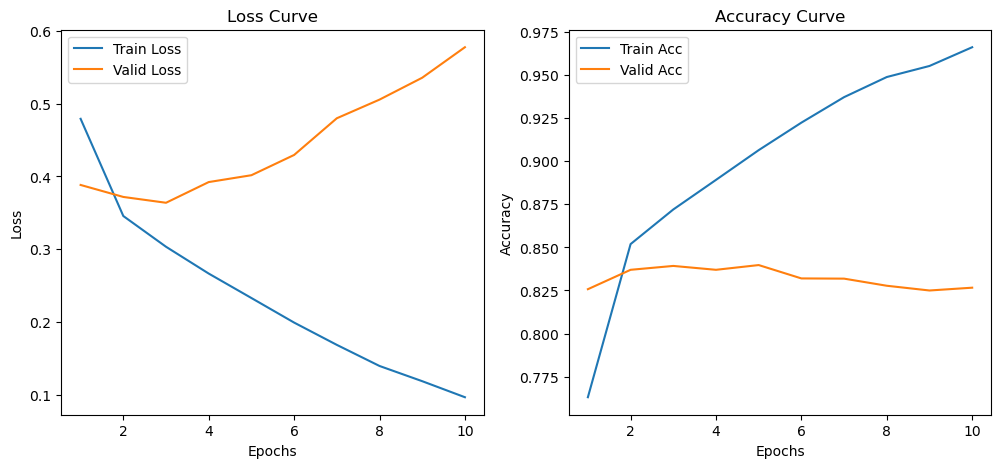

In [89]:
torch.cuda.manual_seed_all(11)
# Hyperparameters for RNN
vocab_size = len(stoi) + 1
embedding_dim = 100
hidden_dim = 32
num_layers = 2
output_dim = 1
dropout = 0.1
pooling = 'concat'

model = SentimentRNN(vocab_size, embedding_dim, hidden_dim, num_layers, output_dim, dropout, pooling)

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
train_model(model, train_loader, valid_loader, criterion, optimizer, epochs=10)

In [ ]:
'''
Best validation accuracy: 83.97%
'''

### Part (iii) [1pt MODEL]

Choose at least 4 hyperparameters to tune. Explain how you tuned the hyperparameters.
You don't need to include your training curve for every model you trained.
Instead, explain what hyperparemters you tuned, what the best validation accuracy was,
and the reasoning behind the hyperparameter decisions you made.

For this assignment, you should tune more than just your learning rate and epoch.
Choose at least 2 hyperparameters that are unrelated to the optimizer.

Epoch 1/5 - Train Loss: 0.6726, Train Acc: 0.5626, Valid Loss: 0.5091, Valid Acc: 0.7585
Epoch 2/5 - Train Loss: 0.4437, Train Acc: 0.8026, Valid Loss: 0.4002, Valid Acc: 0.8153
Epoch 3/5 - Train Loss: 0.3715, Train Acc: 0.8399, Valid Loss: 0.3881, Valid Acc: 0.8321
Epoch 4/5 - Train Loss: 0.3478, Train Acc: 0.8533, Valid Loss: 0.3650, Valid Acc: 0.8439
Epoch 5/5 - Train Loss: 0.3306, Train Acc: 0.8586, Valid Loss: 0.3650, Valid Acc: 0.8430


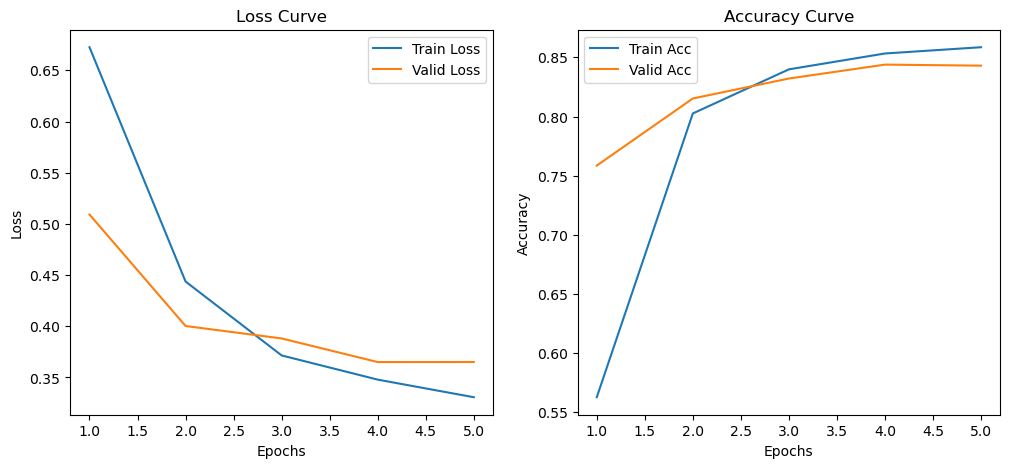

In [96]:
# TO BE COMPLETED
torch.cuda.manual_seed_all(11)
# Hyperparameters for RNN
vocab_size = len(stoi) + 1
embedding_dim = 200
hidden_dim = 64
num_layers = 4
output_dim = 1
dropout = 0.7
pooling = 'concat'

model = SentimentRNN(vocab_size, embedding_dim, hidden_dim, num_layers, output_dim, dropout, pooling)
model.lstm = nn.GRU(embedding_dim, hidden_dim, num_layers=num_layers, batch_first=True, dropout=dropout)

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.00005)
train_model(model, train_loader, valid_loader, criterion, optimizer, epochs=5)

In [98]:
torch.save(model.state_dict(), 'A4-RNN-Yang_Chen_Lin-1011781948.pth')

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW
Best validation accuracy: 84.39%

Tuned hyperparameters and reasons:
1. Increase dropout rate: 
    - increasing the drop out rate can randomly disable neurons during training and prevent overfitting
2. Increase hidden dimension size:
    - the model can learn more complex patterns in the dataset
3. Increase embedding dimension:
    - with a higher embedd_dim, there are more numerical features representing each word, so the model can
    capture richer relationships between words
4. Implement early stop:
    - stop the training process when the validation accuracy stops improving to prevent overfitting
'''

## Part 4. Evaluation [10 pt]

**Important**. At this point in the assignment your test data should not have been evaluated by any of your models. The test data should be evaluated only after you have finished all the previous parts of the assignment. Once you evaluate your models on the test data you cannot change your models or else you may make hyperparameter adjustments that could lead to overfitting to the test data.

### Part (i) [3pt RESULT]

Report the final test accuracy of your model. Comment on how the result compares with accuracy obtained on the training and validation data. Are the results what you expected? Explain.

In [ ]:
# TO BE COMPLETED
test_acc = get_accuracy(model, test_loader)
print(f"Final Test Accuracy: {test_acc:.4f}")

Final Test Accuracy: 0.8540


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW
The test accuracy is lower than the training set but a bit higher than the validation dataset, which shows that this model can generalize well.
This result is expected since the test and valid accuracy are lower than the training accuracy, and the accuracy for test and validation datasets
are similar.
'''

'\nPROVIDE YOUR ANSWER BELOW\n\n\n\n\n\n\n'

### Part (ii) [3pt DISCUSSION]

Look over the misclassified samples in the test data and see if you can find any patterns on where the model has difficulty with identifying the review sentiment. Provide up to 5 examples of positive and negative reviews each to support your findings.

In [114]:
# TO BE COMPLETED

# Ensure model is in evaluation mode
model.eval()

# Move model to the correct device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Get misclassified samples from the test set
misclassified_samples = []
true_labels = []
predicted_labels = []

# Analyze misclassifications
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        predictions = (outputs.squeeze() > 0.5).float()  # Convert to binary predictions
        
        for i in range(len(labels)):
            if predictions[i] != labels[i]:  # Misclassified sample
                misclassified_samples.append(test_data_padded[i])
                true_labels.append(labels[i].item())
                predicted_labels.append(predictions[i].item())

# Convert indices back to words (if vocab exists)
def decode_review(encoded_review, stoi_reverse):
    return " ".join([stoi_reverse[idx] for idx in encoded_review if idx in stoi_reverse])

# Create a reverse stoi dictionary (if available)
stoi_reverse = {v: k for k, v in stoi.items()}

# Extract 5 positive and 5 negative misclassified samples
positive_misclassified = []
negative_misclassified = []

for i in range(len(misclassified_samples)):
    decoded_review = decode_review(misclassified_samples[i], stoi_reverse)
    if true_labels[i] == 1 and len(positive_misclassified) < 5:
        positive_misclassified.append((decoded_review, predicted_labels[i]))
    elif true_labels[i] == 0 and len(negative_misclassified) < 5:
        negative_misclassified.append((decoded_review, predicted_labels[i]))
    
    if len(positive_misclassified) == 5 and len(negative_misclassified) == 5:
        break

# Display results
print("Misclassified as negative:")
for i in positive_misclassified:
    print(i[0])
    
print("\nMisclassified as positive:")
for i in negative_misclassified:
    print(i[0])





Misclassified as negative:
movie completely could believe started late watch came late started watching couldnt stop full good cast members even james many well known actors history eye opening another part society people dont know may even talk ive never heard book movie something black history never looks highly recommend movie
ive watching lot present great low budget late early movie elements decent western good story talented actors everything else although genre way done didnt work made moviebr br movie easily two br first part great great opening scene interesting story going going large part course movie three characters form attempt get money comic earlier films genre comedy doesnt overall br second half film comedy goes movie point right part stop goes waiting four dead place point movie decent western comic br three horrible scenes one one one follow one wasnt bad enough fighting ridiculous since sound picture makes even worse fight scene place around like although worst par

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW
The model performs poorly in several circumstances:
1. When the reviews are in a sarcasim tone
2. Mixing sentiments in a review
3. Slightly biased reviews, but the main tone remains neutral
'''

'\nPROVIDE YOUR ANSWER BELOW\n\n\n\n\n\n\n'

### Part (iii) [2pt RESULT]

What is your model's prediction of the **probability** that
the review message provided below is a positive review?

Hint: You will need to apply the same processing on the review as was done on the the train, val, and test data sets.

In [ ]:
review = """ Man.... I wish I loved this movie more than I did. Don't get me wrong,
it's a solid action movie with jaw-dropping stunts (some of the best in the series),
but as a Mission: Impossible movie, it felt like a small step backward for the franchise.
Fallout had mind-blowing action sequences and stunt work, along with developing Ethan's
relationship with Ilsa, providing closure with Julia, showing the lengths Ethan would
go to protect those closest to him, and battling an imposing villain. Dead Reckoning:
Part One stretches the movie across two films only to seemingly showcase action
spectacle after action spectacle while sacrificing character development.
Characters I have grown to love over a decade of films felt sidelined, ignored,
or wasted. Hayley Atwell's new character chewed up most of the screen time, and
while she was fantastic, I wanted to see more of the original team. The new villain
had an inconsistent ability that confused more than intimidated. There were some
important emotional moments that I just didn't feel the weight of when I definitely
should have. Part Two might tie everything together and make me enjoy Part One
more in retrospect, but unfortunately, I left wanting more from this one. """

In [117]:
# TO BE COMPLETED
# Ensure model is in evaluation mode
model.eval()

# Preprocess the input review (apply the same preprocessing used for training data)
def preprocess_review(review, stoi, seq_len=500):
    """
    Preprocess a single review by tokenizing, encoding, and padding it.
    """
    review_tokens = preprocess_sentence(review)  # Tokenize and remove stopwords
    encoded_review = [stoi[word] for word in review_tokens if word in stoi]  # Convert words to indices
    
    # Apply padding
    padded_review = torch.zeros(seq_len, dtype=torch.long)
    review_length = min(len(encoded_review), seq_len)
    padded_review[-review_length:] = torch.tensor(encoded_review[:seq_len])  # Right-align padding
    
    return padded_review.unsqueeze(0)  # Add batch dimension

# Preprocess the input review
input_review_tensor = preprocess_review(review, stoi).to(device)

# Make prediction
with torch.no_grad():
    probability = model(input_review_tensor)  # Get model output (probability)
    probability = probability.item()  # Convert to scalar value

# Display result
print(probability)

0.9696748852729797


### Part (iv) [2pt DISCUSSION]

Do you think that detecting positive and negative reviews is an easy or difficult task?

Since machine learning models are expensive to train and deploy, it is very
important to compare our models against baseline models: a simple
model that is easy to build and inexpensive to run that we can compare our
recurrent neural network model against.

Explain how you might build a simple baseline model. This baseline model
can be a simple neural network (with very few weights), a hand-written algorithm,
or any other strategy that is easy to build and test.

**Do not actually build a baseline model. Instead, provide instructions on
how to build it.**

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW
I think this is a difficult task when using a machine learning approach, since in some culture a single word represents various meanings, and
also where the position of the word may affect the meaning, too. Moreover, when people speaks in a sarcastic way, the RNN will fail since it
uses a fixed embedded representation for a word, and it will always has a tendency to positiv/negative that won't change.

Baseline model:
My simple approach will be first map positive and negative words to a dictionary, and set a score for negative/positive words with -1 and 1, respectively.
Next, match the words in the sentence of a data with the dictionary to get a score, then we can easily identify the sentiment of the sentence.
This approach can't perform well due to its simple structure, but it's cost efficient, and we can add more sub-tasks to improve the results.
'''

'\nPROVIDE YOUR ANSWER BELOW\n\n\n\n\n\n\n'

# PART B - Transfer Learning

For many natural language processing tasks, it is generally not a good idea to train a very large deep neural network model from scratch due to enormous compute requirements and lack of sufficient amounts of training data. Instead, you should always try to take advantage of an existing model that performs similar tasks as the one you need to solve.

In this part of the assignment we will be using pretrained models to improve the performance on identifying positive and negative reviews. There are several pretrained models that are available to us, here we will use a pretrained BERT model that comes with the hugging face transformer library.

Provided below is sample code to get you started. For more details please visit the hugging face tutorial on using pretrained models using PyTorch: https://huggingface.co/docs/transformers/training

#### Sample Code

In [118]:
# install relevant libraries
!pip install -qq transformers

In [119]:
# load relevant libraries
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup

PRE_TRAINED_MODEL_NAME = 'bert-base-cased'

tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

################### SUBMISSION NOTE ####################################
#  - output of this cell creates issues for converting ipynb to HTML
#  - you may want to delete this output when you are ready to submit

c:\Users\Austin\anaconda3\envs\MIE1517\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Austin\anaconda3\envs\MIE1517\lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Austin\.cache\huggingface\hub\models--bert-base-cased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate deve

In [120]:
sample_txt = 'I want to learn how to do sentiment analysis using BERT and tokenizer.'

encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=32,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
  truncation = True
)

c:\Users\Austin\anaconda3\envs\MIE1517\lib\site-packages\transformers\tokenization_utils_base.py:2690: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [121]:
encoding['input_ids']

tensor([[  101,   146,  1328,  1106,  3858,  1293,  1106,  1202, 17024,  3622,
          1606,   139,  9637,  1942,  1105, 22559, 17260,   119,   102,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0]])

In [122]:
encoding['attention_mask']

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])

In [123]:
hidden_states = bert_model(input_ids=encoding['input_ids'],
                           attention_mask=encoding['attention_mask'])[0]
pooled_output = bert_model(input_ids=encoding['input_ids'],
                           attention_mask=encoding['attention_mask'])[1]

In [124]:
hidden_size = bert_model.config.hidden_size

print(hidden_size)
print(hidden_states.shape)
print(pooled_output.shape)


768
torch.Size([1, 32, 768])
torch.Size([1, 768])


In the sample code provided we loaded a short text sequence, tokenized it using the same tokenization that was used in the pretrained BERT model, and fed the tokenized input into the BERT model to obtain the embeddings.

The model output consists of two forms of embeddings:
- **hidden_states** are the final layer of outputs that has a shape sequence_length x embeddings, much like the hidden states of a recurrent neural network
- **pooled_output** is the result of applying max pooling on the hidden states to effectively collapse the sequence dimenension and ensure the same output size for any given sequence before feeding into the classification stage

Note that we preprocess all of the data prior to training a classifier stage for sentiment analysis to help speed up the training process. This is no different from the process we applied in an earlier assignment using AlexNet and image data.

## Part 1. Data Loading [5 pt]

We will be using the same "IMDB Movie Review Dataset" that we used earlier. Reload the data and complete Part B of the assignment. You should be able to complete part B independently from Part A.

### Part (i) [1pt EXPLORATORY]

Provided below is a DataLoader for your training and test datasets so you can iterate over batches of data. Run the DataLoader to create your training, validation, and test data.

In [126]:
from torch.utils.data import Dataset, DataLoader

class MovieReviewDataset(Dataset):
    def __init__(
        self,
        reviews,
        targets,
        tokenizer,
        max_len,
        bert_model=None,
        embed_folder='embeddings',
        precompute=True
    ):
        """
        reviews     : array/list of text data
        targets     : array/list of 'positive'/'negative' labels
        tokenizer   : BERT tokenizer
        max_len     : maximum sequence length for tokenization
        bert_model  : a BERT model for generating embeddings (if precompute=True)
        embed_folder: folder to store .pt files of precomputed embeddings
        precompute  : True -> generate & save embeddings, False -> load from disk only
        """
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len
        self.bert_model = bert_model
        self.embed_folder = embed_folder
        self.precompute = precompute

        # Create the folder if it doesn't exist
        if not os.path.exists(self.embed_folder):
            os.makedirs(self.embed_folder)

        if self.precompute and (self.bert_model is not None):
            self._precompute_embeddings()

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, idx):
        """
        Returns a dictionary with:
          - 'review_text'   : original text (optional, for reference)
          - 'pooled_output' : [768]-dim embedding from BERT
          - 'last_hidden'   : [seq_len, 768] from the last hidden layer
          - 'targets'       : 0 or 1
        """
        review = str(self.reviews[idx])
        target = 1 if self.targets[idx] == 'positive' else 0

        embed_path = os.path.join(self.embed_folder, f'embedding_{idx}.pt')
        # Load precomputed embeddings
        embedding_dict = torch.load(embed_path)

        return {
            'review_text': review,
            'pooled_output': embedding_dict['pooled'],
            'last_hidden': embedding_dict['last'],
            'targets': torch.tensor(target, dtype=torch.long)
        }


    def _precompute_embeddings(self, batch_size=256, device="cuda"):
        """
        Precompute embeddings in batches rather than one by one.
        """
        # Move the model to device (CPU/GPU)
        self.bert_model = self.bert_model.to(device)
        self.bert_model.eval()

        print("Precomputing BERT embeddings (batched)...")

        # 1) Tokenize everything
        encodings = [self.tokenizer.encode_plus(
            str(review),
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        ) for review in self.reviews]
        input_ids = torch.cat([e['input_ids'] for e in encodings], dim=0)
        attention_masks = torch.cat([e['attention_mask'] for e in encodings], dim=0)

        # 2) Create a TensorDataset and DataLoader
        dataset_tensors = TensorDataset(input_ids, attention_masks)
        dataloader = DataLoader(dataset_tensors, batch_size=batch_size, shuffle=False)

        # We'll need to index back into `self.reviews` to save each sample’s .pt
        idx_offset = 0

        for batch in tqdm(dataloader, total=len(dataloader)):
            input_ids, attention_mask = [t.to(device) for t in batch]

            with torch.no_grad():
                outputs = self.bert_model(
                    input_ids=input_ids,
                    attention_mask=attention_mask,
                    output_hidden_states=True
                )
            # outputs.pooler_output.shape is [batch_size, hidden_dim]
            # outputs.hidden_states[-1].shape is [batch_size, seq_len, hidden_dim]

            pooled_output_batch = outputs.pooler_output.detach().cpu()
            last_hidden_batch = outputs.hidden_states[-1].detach().cpu()

            # 3) Save each sample in the batch
            for i in range(len(input_ids)):
                sample_idx = idx_offset + i
                embed_path = os.path.join(self.embed_folder, f'embedding_{sample_idx}.pt')

                # Skip if already exists (optional check)
                if os.path.isfile(embed_path):
                    continue

                embedding_dict = {
                    'pooled': pooled_output_batch[i].detach().cpu().clone(),
                    'last': last_hidden_batch[i].detach().cpu().clone()
                }

                torch.save(embedding_dict, embed_path)

            idx_offset += len(input_ids)

        print("Done precomputing embeddings.")


In [127]:
# prepare data loaders
MAX_LEN = 400
BATCH_SIZE = 16

#training data
train_dataset = MovieReviewDataset(
    reviews=df_train['review'].values,
    targets=df_train['sentiment'].values,
    tokenizer=tokenizer,
    max_len=MAX_LEN,
    bert_model=bert_model,       # required if we want to precompute now
    embed_folder='train_embeds', # folder to save embeddings
    precompute=True              # set to True so we generate them
)

train_data_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    num_workers=4
) 


#validation data

# TO BE COMPLETED
valid_dataset = MovieReviewDataset(
    reviews=df_valid['review'].values,  # Assuming df_valid contains validation data
    targets=df_valid['sentiment'].values,
    tokenizer=tokenizer,
    max_len=MAX_LEN,
    bert_model=bert_model,       # Required if we want to precompute now
    embed_folder='valid_embeds', # Folder to save embeddings
    precompute=True              # Set to True so we generate them
)

valid_data_loader = DataLoader(
    valid_dataset,
    batch_size=BATCH_SIZE,
    num_workers=4 
)

#test data

# TO BE COMPLETED
test_dataset = MovieReviewDataset(
    reviews=df_test['review'].values,  # Assuming df_test contains test data
    targets=df_test['sentiment'].values,
    tokenizer=tokenizer,
    max_len=MAX_LEN,
    bert_model=bert_model,       # Required if we want to precompute now
    embed_folder='test_embeds',  # Folder to save embeddings
    precompute=True              # Set to True so we generate them
)

test_data_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    num_workers=4  
)

NameError: name 'df_train' is not defined

### Part (ii) [1pt EXPLORATORY]

Use the **train_data_loader** to load one sample. What are the different attributes provided with the sample and how are they used?

In [ ]:
# TO BE COMPLETED




In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

### Part (iii) [1pt EXPLORATORY]

Determine the range of values for the tokens in the training data. How are the tokens obtained?

Hint: You can apply your intuition here, or do some additional research to find how the "bert-base-cased" tokenization is done.

In [ ]:
# TO BE COMPLETED





In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

### Part (iv) [1pt EXPLORATORY]

Generate histograms of all the token values in the training data. Repeat for the validation and test data. What are the top 5 occuring tokens in the training_dataset? What do these tokens represent?

In [ ]:
# TO BE COMPLETED





In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

### Part (v) [1pt EXPLORATORY]

Select a single sample from your training DataLoader and feed it through the **bert_model** to obtain the hidden_states and pooled_output. Briefly describe what each tensor dimension represents and what affects the size of each dimension.

In [ ]:
# TO BE COMPLETED





In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

## Part 2. Model Architecture [2 pt]

### Part (i) [1pt MODEL]

Prepare a review classifier model that builds on the pooled output from the Bert model to identify positive and negative reviews.


An example is provided below in `BaselineSentimentClassifierPooled`, which you can use for inspiration. However, you should build your own model.

In [ ]:
class BaselineSentimentClassifierPooled(nn.Module):
    def __init__(self, n_classes):
        super(BaselineSentimentClassifierPooled, self).__init__()
        self.linear = nn.Linear(768, n_classes)

    def forward(self, pooled_embedding):
        """
        pooled_embedding: shape [batch_size, 768]
        """
        outputs = self.linear(pooled_embedding)
        return outputs


In [ ]:
class SentimentClassifierPooled(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifierPooled, self).__init__()
    # We don't need BERT here, since we have precomputed embeddings
    # TO BE COMPLETED

  def forward(self, pooled_embedding):
    # TO BE COMPLETED



### Part (ii) [1pt MODEL]

Construct the architecture for a review classifier model that uses the last hidden output from the Bert model to identify positive and negative reviews.

An example is provided below in `BaselineSentimentClassifierLast`, which you can use for inspiration . However, you should build your own model.


In [ ]:
class BaselineSentimentClassifierLast(nn.Module):
    def __init__(self, n_classes):
        super(BaselineSentimentClassifierLast, self).__init__()
        # Again, no BERT directly needed if using precomputed data
        self.linear = nn.Linear(768, n_classes)


    def forward(self, last_hidden):
        """
        last_hidden: shape [batch_size, seq_len, 768]
        We'll do a simple max-pool across seq_len dimension => shape [batch_size, 768]
        """
        # last_hidden has shape [B, T, 768]
        # we want max across T => shape [B, 768]
        x, _ = torch.max(last_hidden, dim=1)
        x = self.dropout(x)
        outputs = self.linear(x)
        return outputs


In [ ]:
class SentimentClassifierLast(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifierLast, self).__init__()
    # We don't need BERT here, since we have precomputed embeddings
    # TO BE COMPLETED

  def forward(self, last_hidden):

    # TO BE COMPLETED


## Part 3. Training [3 pt]

### Part (i) [1pt MODEL]

Complete the `get_accuracy` function, which will compute the
accuracy (rate) of your model across a dataset (e.g. validation set).

In [ ]:
def get_accuracy(model, data):
    """ Compute the accuracy of the `model` across a dataset `data`

    Example usage:

    >>> model = MyRNN() # to be defined
    >>> get_accuracy(model, valid_loader) # the variable `valid_loader` is from above
    """

    # TO BE COMPLETED



### Part (ii) [1pt MODEL]

Write a function **train_model** to train your model. Plot the training curve of your final model.
Your training curve should have the training/validation loss and
accuracy plotted periodically.

In [ ]:
# TO BE COMPLETED




### Part (iii) [1pt MODEL]

Choose at least 4 hyperparameters to tune. Explain how you tuned the hyperparameters. You don't need to include your training curve for every model you trained.
Instead, explain what hyperparemters you tuned, what the best validation accuracy was,
and the reasoning behind the hyperparameter decisions you made.

For this assignment, you should tune more than just your learning rate and epoch.
Choose at least 2 hyperparameters that are unrelated to the optimizer.

In [ ]:
# TO BE COMPLETED





In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

## Part 4. Evaluation [10 pt]

### Part (i) [3pt RESULT]

Report the final test accuracy of your best BERT-based model. Then summarize in a pandas dataframe the accuracy obtained on the training, validation, and test data of your best models from Part A and B.

How does the BERT model compare to the approach in part A using only LSTM? Are the results what you expected? Explain.



In [ ]:
# TO BE COMPLETED





In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

### Part (ii) [2pt RESULT]

Report the false positive rate and false negative rate of your model across the test set. Then summarize in a pandas dataframe the false postive and false negative rate of your model obtained on the training, validation, and test data of your best models from Part A and B.

How does the BERT model compare to the approach in part A using only LSTM? Are the results what you expected? Explain.

In [ ]:
# TO BE COMPLETED




In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

### Part (iii) [3pt DISCUSSION]
Examine some of the misclassified reviews from you best BERT and LSTM models to better identify the differences in the models. Try to provide some justification for any differences in the misclassifications observed in the models.

Is there any part of the review that you could modify to make the classifications correct? Try to make small changes to the review to see if you can make the model make the correct classification while keeping the review as close to the original as possible.

In [ ]:
# TO BE COMPLETED





In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

### Part (iv) [2pt DISCUSSION]
Find 5 samples of positive and negative reviews on IMDB that were posted recently and evaluate them with your best BERT and LSTM models from parts A and B. How well do they perform?

In [ ]:
# TO BE COMPLETED





In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

# PART C (Optional) - Bonus Challenge!

This is an optional exercise for those that finish the assignment early and would like to take on a challenging task.

In part A we constructed and trained an LSTM model to identify the sentiment in movie reviews. In Part B we used the embeddings of a BERT model pretrained on a large corpus of text to demonstrate how transfer learning can be used to improve our movie sentiment model. The BERT model is one of many language models that we could have used to implement transfer learning.

For this bonus challenge you are asked to implement a generative character-level LSTM model to produce IMDB movie reviews. Once the model is sufficiently trained you can then use its hidden states as the embedding for training a movie sentiment model. Construct your new movie sentiment analysis model and compare the performance against the model from part A and B.

There are many variants of a generative LSTM model that you can consider. As a starting point you can use the generative LSTM sample code provided in the lecture notes. Specifically, the one used to generate Shakeaspeare. More advanced versions of a generative LSTM can be found in the Universal Language Model Fine-turing for Text Classification (ULMfit) paper (https://arxiv.org/abs/1801.06146).

Tasks:

1. Create a generative character-level LSTM model trained to create IMDB reviews
2. Create a classifier using the embeddings from the generative LSTM model (from step 1) to identify positive and negative reviews.
3. Compare the performance of the model with the results in parts A and B of the assignment.
4. Upgrade the generative LSTM model using the techniques listed in the ULMfit paper (e.g., bi-directional LSTM, pretraining with wikipedia text and fine-tuning on IMDBT reviews, etc.).

Bonus marks will be provided based on the number of steps completed. Summarize below your results and anything intersting you learned from the steps that you completed. Bonus marks cannot be accumulated beyond a maximum assignment grade.


In [ ]:
# TO BE COMPLETED




In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [ ]:
#!pip install nbconvert

%%shell
jupyter nbconvert --to html /content/A4.ipynb


(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus

# Assignment Grading Rubric
The grading of the assignment will be based on the following categories:

(1) **10 Pt - EXPLORATORY QUESTIONS** These are basic questions that in most cases can be answered without requiring a fully working and trained neural network model. For example, data loading, processing and visualization, summary statistics, data exploration, model and training setup, etc.

(2) **10 Pt - MODEL** Student has successfully implemented all the required neural network models and has demonstrated successful training of the model without any errors.

(3) **10 Pt - RESULT** Students are evaluated based on the results achieved in comparison to the expected results of the assignment.

(4) **10 Pt - DISCUSSION QUESTIONS** Student demonstrated understanding beyond the basic exploratory questions, can answer some of the more challenging questions, and provide arguments for their model selection decisions.

(5) **10 Pt - COMMUNICATION** Student has provided a quality submission that is easy to read without too many unnecessary output statements that distract the reading of the document. The code has been well commented and all the answers are communicated clearly and concisely.

(6) **10 Pt - BONUS** Student has completed the assignment and has taken on the challenging bonus tasks listed in PART C. The student has demonstrated a good understanding of all aspects of the assignment and has exceeded expectations for the assignment.



**TOTAL GRADE = _____ of 50 Pts**